In [1]:
# 이미지 크롭 처리 - 라이브러리 import
import cv2
import matplotlib.pyplot as plt

# ===== 설정 (여기만 수정하면 됨) =====
IMAGE_PATH = "2page18-1.png"  # 이미지 경로 (절대경로 또는 상대경로)
# ==================================

In [2]:
# 크롭 비율 설정 (0.0 ~ 1.0, 이미지 전체 크기 기준)
# 예: 0.20 = 20% 해당 영역 제거
CROP_TOP = 0.20     # 상단 20% 제거
CROP_BOTTOM = 0.05  # 하단 5% 제거
CROP_LEFT = 0.10    # 좌측 10% 제거
# 우측(Right)은 유지 → CROP_RIGHT = 0


In [3]:
# 1. 이미지 로드 (컬러 모드 유지, OpenCV 기본값)
img = cv2.imread(IMAGE_PATH)

if img is None:
    raise FileNotFoundError(f"이미지를 찾을 수 없습니다: {IMAGE_PATH}")

# 2. BGR -> RGB 변환 (OpenCV는 BGR, matplotlib은 RGB 사용)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3. 이미지 width, height 획득
height, width = img.shape[:2]

# 4. 픽셀 좌표 계산 (비율 * 이미지크기)
x_start = int(width * CROP_LEFT)   # 좌측 10% 제거 -> x 시작점
x_end = width                       # 우측 유지 -> x 끝점
y_start = int(height * CROP_TOP)   # 상단 20% 제거 -> y 시작점
y_end = int(height * (1 - CROP_BOTTOM))  # 하단 5% 제거 -> y 끝점 (95%까지만)

# 5. 크롭 적용 [y_start:y_end, x_start:x_end]
cropped_img = img_rgb[y_start:y_end, x_start:x_end]

print(f"원본 크기: {width} x {height}")
print(f"크롭 후: {cropped_img.shape[1]} x {cropped_img.shape[0]}")

원본 크기: 739 x 1032
크롭 후: 666 x 774


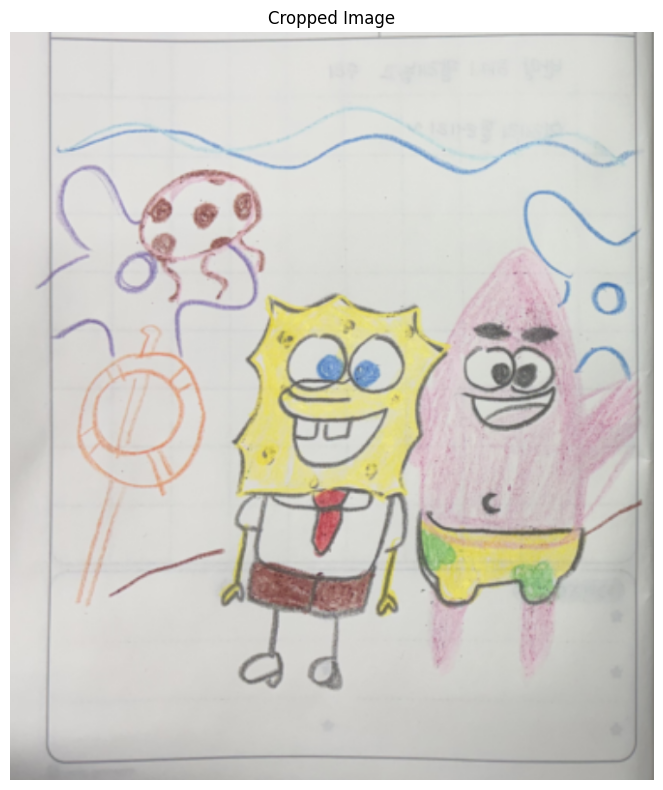

In [4]:
# 크롭된 이미지를 matplotlib으로 시각화
plt.figure(figsize=(10, 8))
plt.imshow(cropped_img)
plt.axis("off")  # 축 숨김
plt.title("Cropped Image")
plt.tight_layout()
plt.show()